<a href="https://cognitiveclass.ai"><img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width = 400> </a>

<h1 align=center><font size = 5>Build a Regression Model in Keras</font></h1>


## Introduction


In this course project, you will build a regression model using the deep learning Keras library, and then you will experiment with increasing the number of training epochs and changing number of hidden layers and you will see how changing these parameters impacts the performance of the model.

This assignment will be marked by your peers and will be worth 20% of your total grade. The breakdown will be:
Part A: 5 marks
Part B: 5 marks
Part C: 5 marks
Part D: 5 marks

1. Assignment Topic:

In this project, you will build a regression model using the Keras library to model the same data about concrete compressive strength that we used in labs 3.

2. Concrete Data:

For your convenience, the data can be found here again: https://cocl.us/concrete_data. To recap, the predictors in the data of concrete strength include:

Cement
Blast Furnace Slag
Fly Ash
Water
Superplasticizer
Coarse Aggregate
Fine Aggregate
3. Assignment Instructions:

Please check the My Submission tab for detailed assignment instructions.

4. How to submit:

You will need to submit your code for each part in a Jupyter Notebook. Since each part builds on the previous one, you can submit the same notebook four times for grading. Please make sure that you:

use Markdown to clearly label your code for each part,
properly comment your code so that your peer who is grading your work is able to understand your code easily,
include your comments and discussion of the difference in the mean of the mean squared errors among the different parts.

<h2>Import the necessary libraries</h2>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

!pip install keras==2.3.0
import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

You should consider upgrading via the 'c:\users\nimes\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.
Using TensorFlow backend.


<a id="item31"></a>


## Download and Clean Dataset


Let's start by importing the <em>pandas</em> and the Numpy libraries.


In [8]:
concrete_data = pd.read_csv('E:/IBM AI ENGINEER/3. Introduction to Deep Learning & Neural Networks with Keras/Week 5/concrete_data.csv')

concrete_data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30



<strong>The dataset is about the compressive strength of different samples of concrete based on the volumes of the different ingredients that were used to make them. Ingredients include:</strong>

<strong>1. Cement</strong>

<strong>2. Blast Furnace Slag</strong>

<strong>3. Fly Ash</strong>

<strong>4. Water</strong>

<strong>5. Superplasticizer</strong>

<strong>6. Coarse Aggregate</strong>

<strong>7. Fine Aggregate</strong>


#### Let's check how many data points we have.


In [9]:
concrete_data.shape

(1030, 9)

So, there are approximately 1000 samples to train our model on. Because of the few samples, we have to be careful not to overfit the training data.


In [10]:
#Check for any missing values
concrete_data.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


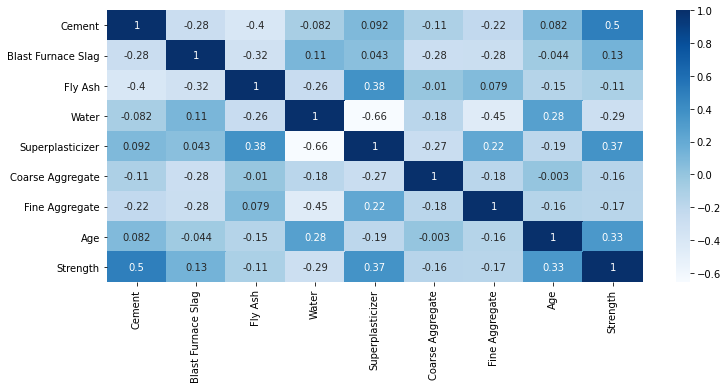

In [11]:
#Plot HeatMap of the dataset
plt.figure(figsize=(12, 5))
correlation_matrix = concrete_data.corr()
sns.heatmap(correlation_matrix,cmap="Blues", annot=True)
plt.show()

In [12]:
#Check for missing values
concrete_data.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

The data looks very clean and is ready to be used to build our model.


#### Split data into predictors and target . The target variable in this problem is the concrete sample strength. Therefore, our predictors will be all the other columns.


In [13]:
concrete_data_columns = concrete_data.columns
predictors = concrete_data[concrete_data_columns[concrete_data_columns != 'Strength']] # Select all the columns but "Strength" as predictors
target = concrete_data['Strength'] # Select "Strength" as labels

#### Let's do a quick sanity check of the predictors and the target dataframes.


In [ ]:
predictors.head()

In [ ]:
target.head()

In [ ]:
# number of predictors
n_cols = predictors.shape[1]
print(n_cols)

## PART A. 

### Build a baseline model 

In [ ]:
# Hidden Layer: 1
# Nodes: 10
# Activation Function: ReLU
# Optimizer: Adam
# Loss Function: Mean Squared Error train_test_split: 70,30
# Epochs: 50

def regression_model():
    # creation of the model
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(1))
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [ ]:
# Splitting the data set for training and testing
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=6)

In [ ]:
# build model for part A
modelA = regression_model()
epochs = 50
modelA.fit(X_train,y_train,epochs = epochs, verbose = 1)

In [ ]:
loss_val = modelA.evaluate(X_test, y_test)
loss_val

In [ ]:
y_hat = modelA.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test,y_hat)
print("Mean Squared Error = {}".format(mse))

In [ ]:
mse_lst = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.3, random_state=6)
    modelA = regression_model()
    modelA.fit(X_train,y_train,epochs = 50, verbose = 0)
    
    y_hat = modelA.predict(X_test)
    mse = mean_squared_error(y_test,y_hat)
    mse_lst.append(mse)

In [ ]:
mean = np.mean(mse_lst)
standard_deviation = np.std(mse_lst)

print("Mean = {}, Standard Deviation = {}".format(mean,standard_deviation))

<a id="item1"></a>


## PART B

#### Repeat Part A but use a normalized version of the data. Recall that one way to normalize the data is by subtracting the mean from the individual predictors and dividing by the standard deviation.


In [ ]:
# Normalizing Predictors and printing the first five rows.
predictors_norm = (predictors- predictors.mean())/predictors.std()
predictors_norm.head()

In [ ]:
# Splitting the normalized data set for training and testing
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)

In [ ]:
#Build model for Part B and training it
modelB = regression_model()
epochs = 50
modelB.fit(X_train_norm,y_train_norm,epochs = epochs, verbose = 1)

In [ ]:
# Evaluate the model on the test data set
loss_valB = modelB.evaluate(X_test_norm, y_test_norm)
loss_valB

In [ ]:
y_hat_norm = modelB.predict(X_test_norm)

In [ ]:
mseB = mean_squared_error(y_test_norm,y_hat_norm)
print("Mean Squared Error for normalized predictors = {}".format(mseB))

In [ ]:
mse_lst_B = []
for i in range(50):
    X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)
    modelB = regression_model()
    modelB.fit(X_train_norm,y_train_norm,epochs = 50, verbose = 0)
    
    y_hat_norm = modelB.predict(X_test_norm)
    mseB = mean_squared_error(y_test_norm,y_hat_norm)
    mse_lst_B.append(mseB)

In [ ]:
mean_B = np.mean(mse_lst_B)
standard_deviation_B = np.std(mse_lst_B)

print("For Mean Squared Errors, Mean = {}, Standard Deviation = {}".format(mean_B,standard_deviation_B))

#### How does the mean of the mean squared errors compare to that from Step A?

The mean of the mean squared error has gone down a bit (~10%), but the std deviation has gone down significantly. This implies that when using normalized data, the performance on the test set is much less dependent on how the data happened to be (randomly) split into a training and a test data set.


<a id="item4"></a>


<a id='item34'></a>


## PART C

### Repeat Part B but use 100 epochs this time for training.


In [ ]:
# Splitting the normalized data set for training and testing
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)

In [ ]:
#Build model for Part C and training it
modelC = regression_model()
epochs = 100
modelC.fit(X_train_C,y_train_C,epochs = epochs, verbose = 1)

In [ ]:
loss_valC = modelC.evaluate(X_test_C, y_test_C)
loss_valC

In [ ]:
y_hat_C = modelC.predict(X_test_C)

In [ ]:
mseC = mean_squared_error(y_test_C,y_hat_C)
print("Mean Squared Error for normalized predictors with 100 epoch training = {}".format(mseC))

In [ ]:
mse_lst_C = []
for i in range(50):
    X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)
    modelC = regression_model()
    modelC.fit(X_train_C,y_train_C,epochs = 100, verbose = 0)
    
    y_hat_C = modelC.predict(X_test_C)
    mseC = mean_squared_error(y_test_C,y_hat_C)
    mse_lst_C.append(mseC)

In [ ]:
mean_C = np.mean(mse_lst_C)
standard_deviation_C = np.std(mse_lst_C)

print("For Mean Squared Errors with 100 epochs for training, Mean = {}, Standard Deviation = {}".format(mean_C,standard_deviation_C))

In [ ]:
mean_change_percentage = ((mean_B - mean_C)/mean_B)*100
print("The mean of the mean squared errors have decreased by {}% relative to 50 epoch training.".format(mean_change_percentage))

#### How does the mean of the mean squared errors compare to that from Step B?

The mean squared error on the test set more than halved. Clearly, there was plenty of improvement to be gained with additional training. The standard deviation has gone down a lot as well.

## PART D

### Increase the number of hidden layers


In [ ]:
def regression_model_modified():
    # creation of the model
    model = Sequential()
    model.add(Dense(10, activation = 'relu', input_shape = (n_cols,)))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(10, activation = 'relu'))
    model.add(Dense(1))
    
    # compile the model
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

In [ ]:
# Splitting the normalized data set for training and testing
X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)

In [ ]:
# Build model for Part D and training it
modelD = regression_model_modified()
epochs = 50
modelD.fit(X_train_D,y_train_D,epochs = epochs, verbose = 1)

In [ ]:
loss_valD = modelD.evaluate(X_test_D, y_test_D)
loss_valD

In [ ]:
y_hat_D = modelD.predict(X_test_D)

In [ ]:
mseD = mean_squared_error(y_test_D,y_hat_D)
print("Mean Squared Error for normalized predictors with 3 dense layer network = {}".format(mseD))

In [ ]:
mse_lst_D = []
for i in range(50):
    X_train_D, X_test_D, y_train_D, y_test_D = train_test_split(predictors_norm, target, test_size=0.3, random_state=6)
    modelD = regression_model_modified()
    modelD.fit(X_train_D,y_train_D,epochs = 50, verbose = 0)
    
    y_hat_D = modelD.predict(X_test_D)
    mseD = mean_squared_error(y_test_D,y_hat_D)
    mse_lst_D.append(mseD)

In [ ]:
mean_D = np.mean(mse_lst_D)
standard_deviation_D = np.std(mse_lst_D)

print("For Mean Squared Errors with 3 dense layer network, Mean = {}, Standard Deviation = {}".format(mean_D,standard_deviation_D))

In [ ]:
mean_change_percentage2 = ((mean_B - mean_D)/mean_B)*100
print("The mean of the mean squared errors have decreased by {}% relative to 1 dense layer network.".format(mean_change_percentage2))

### How does the mean of the mean squared errors compare to that from Step B?

The mean of the mean squared errors is a lot better than in part B (123 vs 321).
This shows that the network with multiple hidden layers was significantly better at learning to predict the 'Strength' feature than the single layer network.